In [ ]:
pip install opencv-python numpy pytesseract

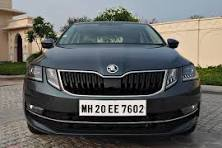

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Load the uploaded image (modify the filename)
image = cv2.imread("/content/download.jfif")

# Display the uploaded image using cv2_imshow
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

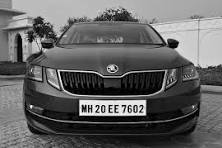

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Import the necessary function
from google.colab.patches import cv2_imshow

# Display grayscale image using cv2_imshow
cv2_imshow(gray)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Apply bilateral filtering to reduce noise
filtered = cv2.bilateralFilter(gray, 11, 17, 17)

# Detect edges using Canny
edges = cv2.Canny(filtered, 30, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

plate = None
for c in contours:
    approx = cv2.approxPolyDP(c, 0.02 * cv2.arcLength(c, True), True)
    if len(approx) == 4:  # Looks like a rectangle
        plate = approx
        break

# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow

if plate is not None:
    x, y, w, h = cv2.boundingRect(plate)
    number_plate = gray[y:y+h, x:x+w]

    # Display detected number plate using cv2_imshow
    cv2_imshow(number_plate)  # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)
else:
    print("Number plate not detected.")

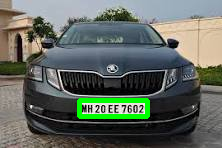

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Draw a bounding box on the original image
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display highlighted number plate using cv2_imshow
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()